# Modelos de classificação

## Modelos utilizados

Neste notebook, vamos treinar e avaliar três algoritmos clássicos de classificação:

- **Regressão Logística**: Modelo simples e interpretável
- **SVM (Support Vector Machine)**: Algoritmo baseado em margens de separação
- **Árvore de Decisão**: Modelo baseado em regras hierárquicas

Utilizaremos o dataset de câncer de mama preparado anteriormente.

## Importar bibliotecas

In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Configurar warnings
import warnings
warnings.filterwarnings('ignore')

## Carregar dados

In [76]:
# Caminho para o arquivo de dados
data_file = "data/breast_cancer/breast_cancer.parquet"

# Carregar os dados
data = pd.read_parquet(data_file)

print(f"Dataset carregado com sucesso!")
print(f"Dimensões: {data.shape}")
data.head()

Dataset carregado com sucesso!
Dimensões: (569, 13)


,id_number,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,diagnosis_y
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


## Preparar dados para treinamento

In [77]:
# Selecionar features (X) e variável alvo (y)
feature_columns = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                   'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

X = data[feature_columns]
y = data['diagnosis_y']

print(f"Features (X): {X.shape}")
print(f"Alvo (y): {y.shape}")
print(f"\nDistribuição das classes:")
print(y.value_counts())

Features (X): (569, 10)
Alvo (y): (569,)

Distribuição das classes:
diagnosis_y
0    357
1    212
Name: count, dtype: int64


## Dividir dados em treino e teste

In [78]:
# Dividir em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Conjunto de treino: {X_train.shape}")
print(f"Conjunto de teste: {X_test.shape}")
print(f"\nDistribuição no treino:")
print(y_train.value_counts())
print(f"\nDistribuição no teste:")
print(y_test.value_counts())

Conjunto de treino: (455, 10)
Conjunto de teste: (114, 10)

Distribuição no treino:
diagnosis_y
0    285
1    170
Name: count, dtype: int64

Distribuição no teste:
diagnosis_y
0    72
1    42
Name: count, dtype: int64


## Normalizar dados

In [79]:
# Normalizar features (importante para SVM e Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados normalizados com sucesso!")
print(f"\nMédia após normalização (deve ser ~0): {X_train_scaled.mean():.6f}")
print(f"Desvio padrão após normalização (deve ser ~1): {X_train_scaled.std():.6f}")

Dados normalizados com sucesso!

Média após normalização (deve ser ~0): 0.000000
Desvio padrão após normalização (deve ser ~1): 1.000000


# Modelo 1: Regressão Logística

## Treinar modelo

In [80]:
# Criar e treinar o modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


## Avaliar modelo

In [81]:
# Fazer previsões
y_pred_lr = lr_model.predict(X_test_scaled)

# Calcular acurácia
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia: {accuracy_lr:.4f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr, target_names=['Benigno', 'Maligno']))

Acurácia: 0.9298

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.96      0.93      0.94        72
     Maligno       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Matriz de confusão

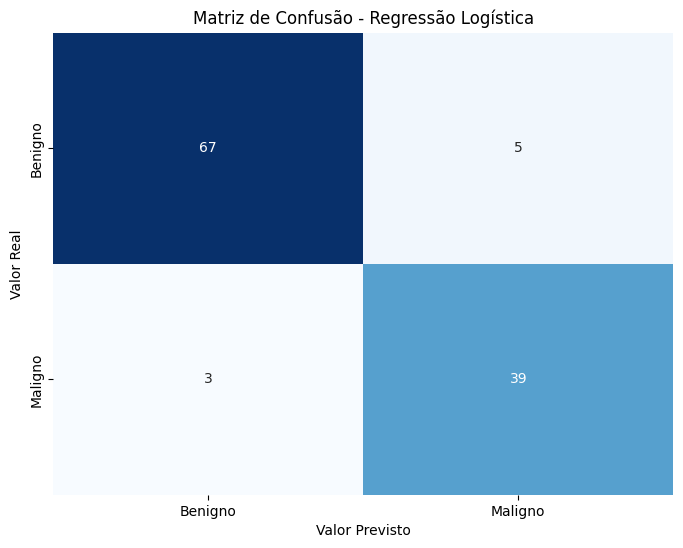

In [82]:
# Plotar matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Modelo 2: SVM (Support Vector Machine)

## Treinar modelo

In [83]:
# Criar e treinar o modelo SVM com kernel RBF
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

print("Modelo SVM treinado com sucesso!")

Modelo SVM treinado com sucesso!


## Avaliar modelo

In [84]:
# Fazer previsões
y_pred_svm = svm_model.predict(X_test_scaled)

# Calcular acurácia
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia: {accuracy_svm:.4f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_svm, target_names=['Benigno', 'Maligno']))

Acurácia: 0.9561

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        72
     Maligno       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Matriz de confusão

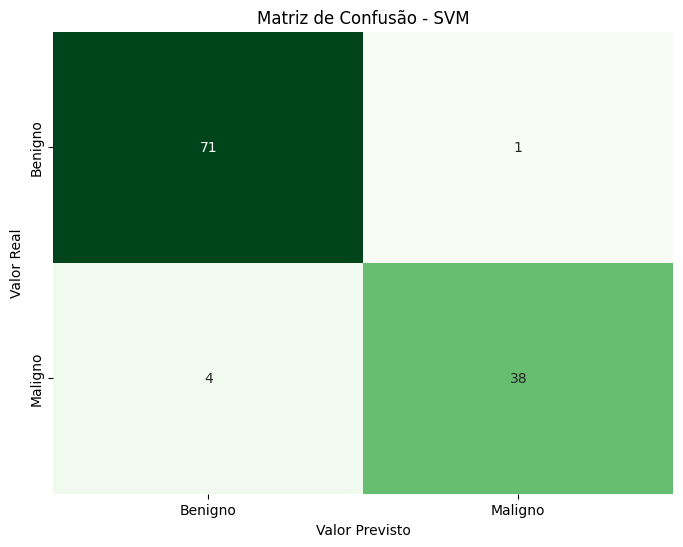

In [85]:
# Plotar matriz de confusão
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão - SVM')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Modelo 3: Árvore de Decisão

## Treinar modelo

In [86]:
# Criar e treinar o modelo (usamos dados não normalizados para melhor interpretabilidade)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!



## Avaliar modelo

In [87]:
# Fazer previsões
y_pred_dt = dt_model.predict(X_test)

# Calcular acurácia
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia: {accuracy_dt:.4f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt, target_names=['Benigno', 'Maligno']))

Acurácia: 0.9123

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.91      0.96      0.93        72
     Maligno       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



## Matriz de confusão

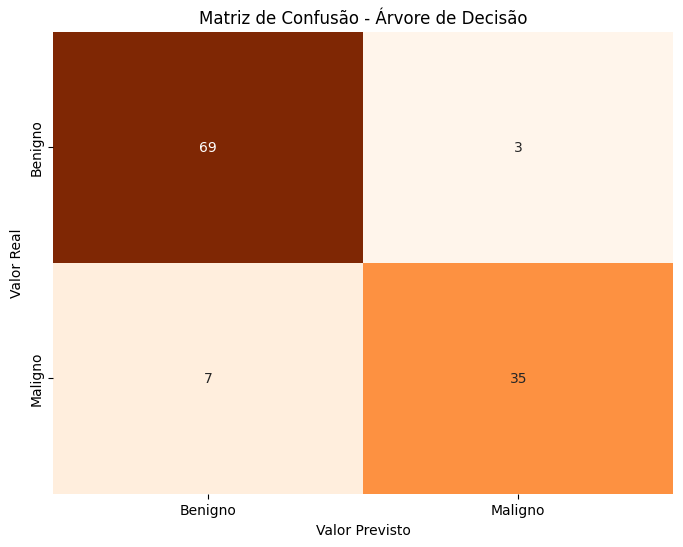

In [88]:
# Plotar matriz de confusão
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

## Visualizar árvore de decisão

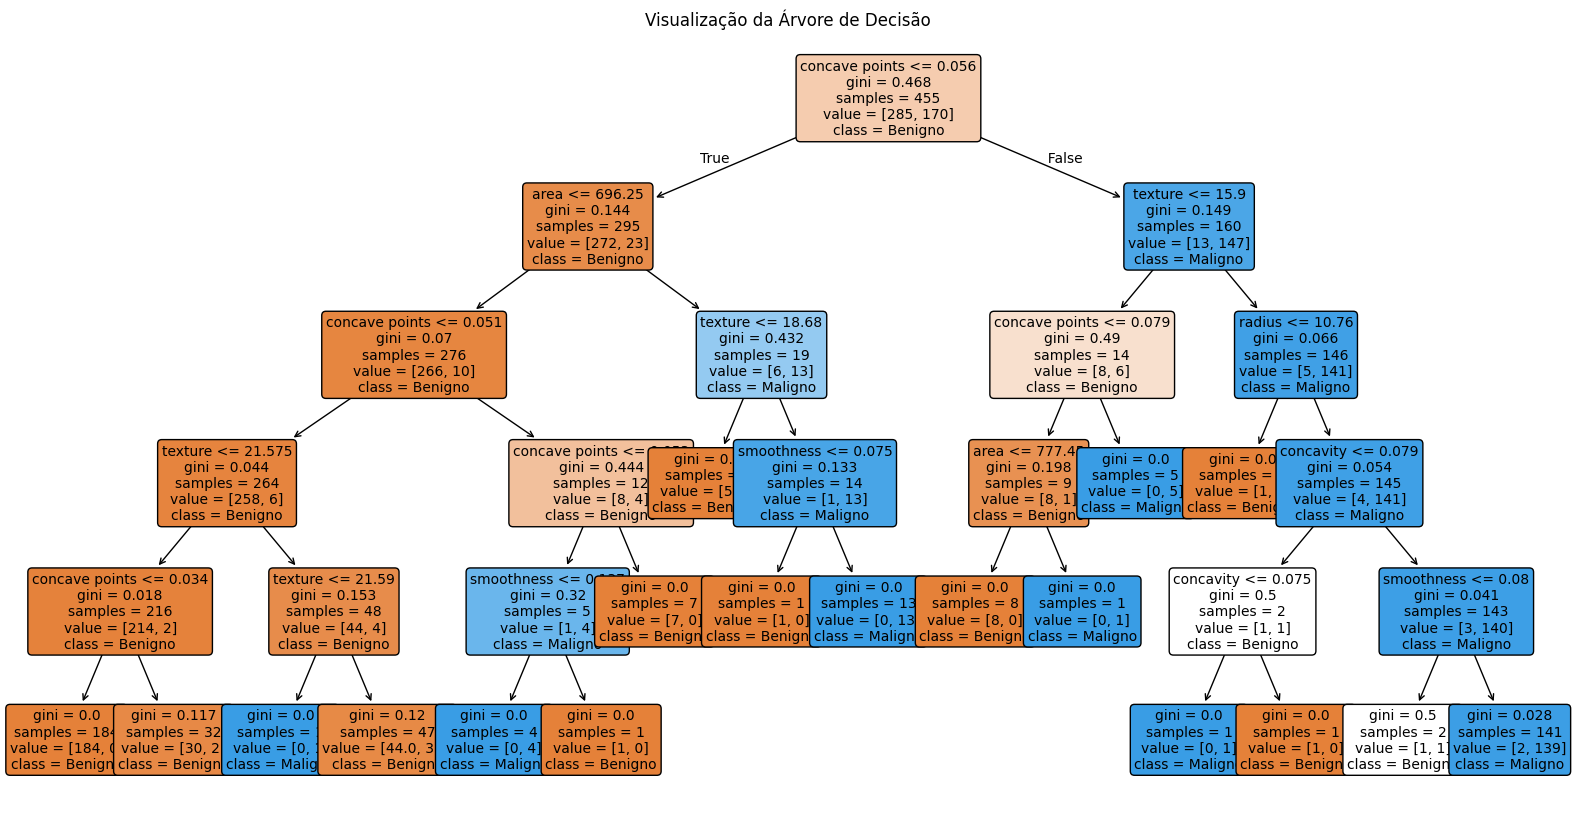

In [89]:
# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=feature_columns,
          class_names=['Benigno', 'Maligno'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Visualização da Árvore de Decisão')
plt.show()

## Importância das features

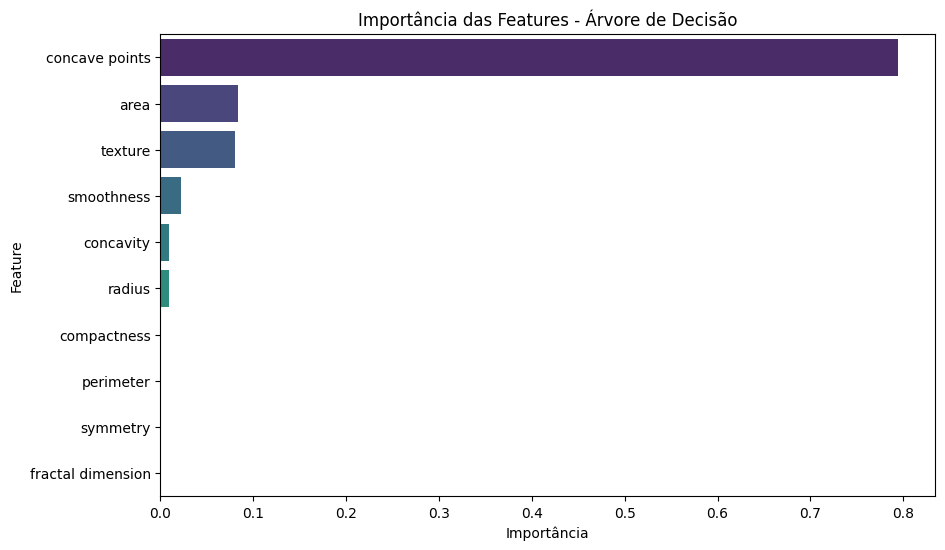


Importância das Features:
             feature  importance
7     concave points    0.794871
3               area    0.084092
1            texture    0.079904
4         smoothness    0.022088
6          concavity    0.009590
0             radius    0.009455
5        compactness    0.000000
2          perimeter    0.000000
8           symmetry    0.000000
9  fractal dimension    0.000000


In [90]:
# Obter importância das features
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plotar importância
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Importância das Features - Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

print("\nImportância das Features:")
print(feature_importance)

# Comparação dos Modelos

## Comparar acurácias

In [91]:
# Criar DataFrame com resultados
results = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'SVM', 'Árvore de Decisão'],
    'Acurácia': [accuracy_lr, accuracy_svm, accuracy_dt]
}).sort_values('Acurácia', ascending=False)

print("Comparação de Acurácias:")
print(results)
print(f"\nMelhor modelo: {results.iloc[0]['Modelo']} com {results.iloc[0]['Acurácia']:.4f}")

Comparação de Acurácias:
                Modelo  Acurácia
1                  SVM  0.956140
0  Regressão Logística  0.929825
2    Árvore de Decisão  0.912281

Melhor modelo: SVM com 0.9561


## Visualizar comparação

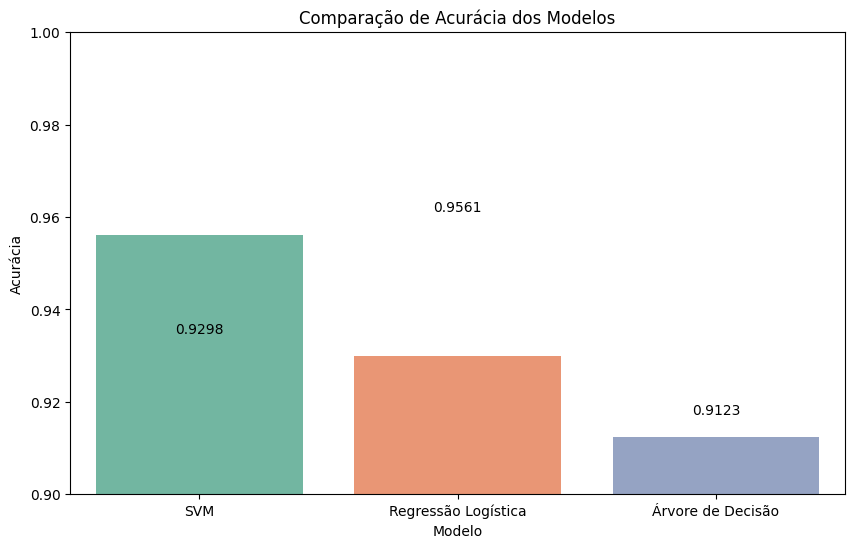

In [92]:
# Plotar comparação de acurácias
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Modelo', y='Acurácia', palette='Set2')
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.0)
for i, row in results.iterrows():
    plt.text(i, row['Acurácia'] + 0.005, f"{row['Acurácia']:.4f}", ha='center')
plt.show()

## Curvas ROC

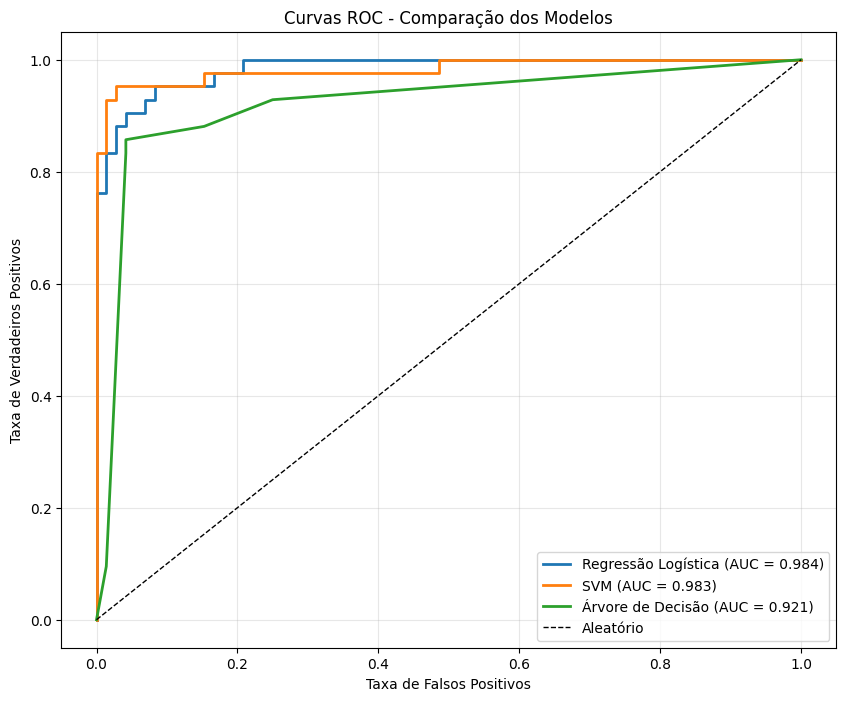

In [93]:
# Calcular probabilidades para curvas ROC
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calcular curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

# Calcular AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)
auc_dt = auc(fpr_dt, tpr_dt)

# Plotar curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Árvore de Decisão (AUC = {auc_dt:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório', linewidth=1)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Comparação dos Modelos')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Exemplo de Uso do Modelo

Vamos usar o melhor modelo para fazer previsões em novos casos.

## Selecionar melhor modelo

In [94]:
# Identificar o melhor modelo baseado na acurácia
best_model_name = results.iloc[0]['Modelo']
best_accuracy = results.iloc[0]['Acurácia']

# Mapear o nome para o modelo correspondente
models_map = {
    'Regressão Logística': (lr_model, True),  # True = precisa normalizar
    'SVM': (svm_model, True),
    'Árvore de Decisão': (dt_model, False)
}

best_model, needs_scaling = models_map[best_model_name]

print(f"Melhor modelo selecionado: {best_model_name}")
print(f"Acurácia: {best_accuracy:.4f}")

Melhor modelo selecionado: SVM
Acurácia: 0.9561


## Criar novos casos para predição

In [95]:
# Criar alguns casos hipotéticos para predição

# Caso 1: Características típicas de tumor benigno (valores menores)
caso1 = {
    'radius': 11.0,
    'texture': 16.0,
    'perimeter': 70.0,
    'area': 380.0,
    'smoothness': 0.08,
    'compactness': 0.05,
    'concavity': 0.02,
    'concave points': 0.01,
    'symmetry': 0.17,
    'fractal dimension': 0.06
}

# Caso 2: Características típicas de tumor maligno (valores maiores)
caso2 = {
    'radius': 20.0,
    'texture': 25.0,
    'perimeter': 130.0,
    'area': 1200.0,
    'smoothness': 0.12,
    'compactness': 0.25,
    'concavity': 0.30,
    'concave points': 0.15,
    'symmetry': 0.25,
    'fractal dimension': 0.08
}

# Caso 3: Características intermediárias
caso3 = {
    'radius': 15.0,
    'texture': 20.0,
    'perimeter': 95.0,
    'area': 700.0,
    'smoothness': 0.10,
    'compactness': 0.15,
    'concavity': 0.18,
    'concave points': 0.08,
    'symmetry': 0.20,
    'fractal dimension': 0.07
}

# Criar DataFrame com os novos casos
novos_casos = pd.DataFrame([caso1, caso2, caso3])
novos_casos.index = ['Caso 1 (Provável Benigno)', 'Caso 2 (Provável Maligno)', 'Caso 3 (Intermediário)']

## Novos casos para predição

In [96]:
novos_casos

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
Caso 1 (Provável Benigno),11.0,16.0,70.0,380.0,0.08,0.05,0.02,0.01,0.17,0.06
Caso 2 (Provável Maligno),20.0,25.0,130.0,1200.0,0.12,0.25,0.30,0.15,0.25,0.08
Caso 3 (Intermediário),15.0,20.0,95.0,700.0,0.10,0.15,0.18,0.08,0.20,0.07


## Fazer predições

In [97]:
# Preparar dados para predição
if needs_scaling:
    # Normalizar se necessário (LR e SVM)
    novos_casos_preparados = scaler.transform(novos_casos)
else:
    # Usar dados originais (Árvore de Decisão)
    novos_casos_preparados = novos_casos

# Fazer predições
predicoes = best_model.predict(novos_casos_preparados)
probabilidades = best_model.predict_proba(novos_casos_preparados)

# Criar DataFrame com resultados
resultados_predicao = pd.DataFrame({
    'Diagnóstico Previsto': ['Benigno' if p == 0 else 'Maligno' for p in predicoes],
    'Probabilidade Benigno': probabilidades[:, 0].round(4),
    'Probabilidade Maligno': probabilidades[:, 1].round(4),
    'Confiança': [round(max(prob), 4) for prob in probabilidades]
}, index=novos_casos.index)

## Resultados da predição

In [98]:
resultados_predicao

,Diagnóstico Previsto,Probabilidade Benigno,Probabilidade Maligno,Confiança
Caso 1 (Provável Benigno),Benigno,0.9919,0.0081,0.9919
Caso 2 (Provável Maligno),Maligno,0.0160,0.9840,0.9840
Caso 3 (Intermediário),Maligno,0.0251,0.9749,0.9749


## Visualizar resultados

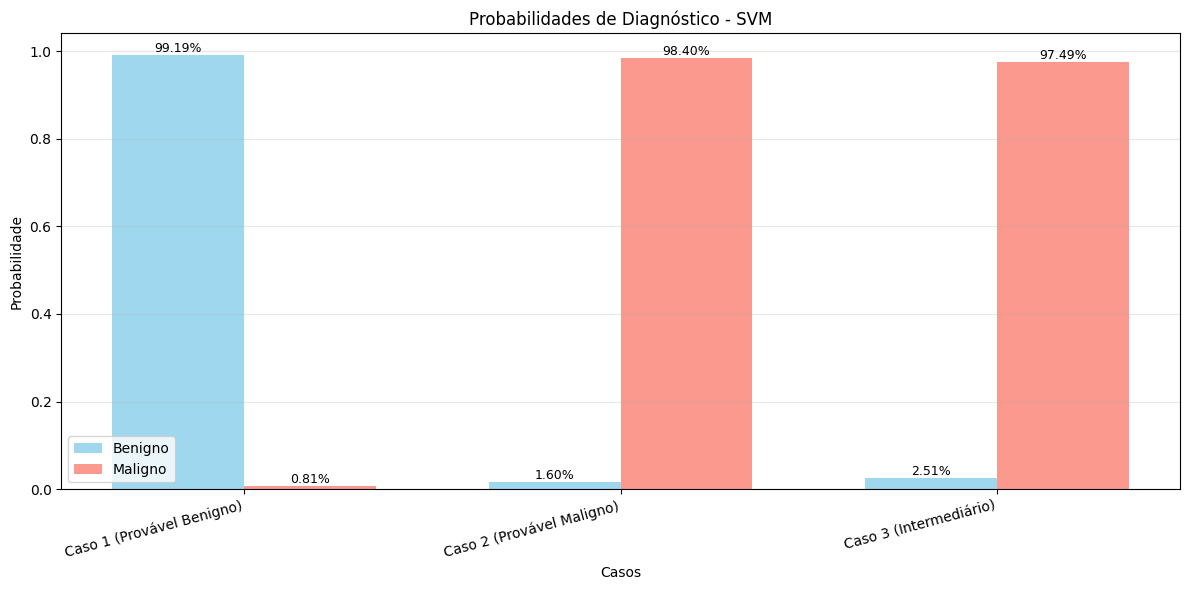

In [99]:
# Visualizar probabilidades
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(novos_casos))
width = 0.35

bars1 = ax.bar(x - width/2, resultados_predicao['Probabilidade Benigno'], width, 
               label='Benigno', color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, resultados_predicao['Probabilidade Maligno'], width,
               label='Maligno', color='salmon', alpha=0.8)

ax.set_xlabel('Casos')
ax.set_ylabel('Probabilidade')
ax.set_title(f'Probabilidades de Diagnóstico - {best_model_name}')
ax.set_xticks(x)
ax.set_xticklabels(novos_casos.index, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Interpretação dos resultados

In [101]:
for idx, row in resultados_predicao.iterrows():
    print(f"\n{idx}:")
    print(f"  Diagnóstico: {row['Diagnóstico Previsto']}")
    print(f"  Confiança: {row['Confiança']:.2%}")
    if row['Confiança'] > 0.9:
        print(f"  ✓ Alta confiança na predição")
    elif row['Confiança'] > 0.7:
        print(f"  ⚠ Confiança moderada - recomenda-se análise adicional")
    else:
        print(f"  ⚠ Baixa confiança - resultado inconclusivo")


Caso 1 (Provável Benigno):
  Diagnóstico: Benigno
  Confiança: 99.19%
  ✓ Alta confiança na predição

Caso 2 (Provável Maligno):
  Diagnóstico: Maligno
  Confiança: 98.40%
  ✓ Alta confiança na predição

Caso 3 (Intermediário):
  Diagnóstico: Maligno
  Confiança: 97.49%
  ✓ Alta confiança na predição
